In [2]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install scipy
!pip install tabulate


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
# import python libraries
import numpy as np # mathematical use
import pandas as pd # dataframe
import matplotlib.pyplot as plt # visualizing data
%matplotlib inline
import seaborn as sn
import os
from scipy import stats

In [4]:
current_dir = os.getcwd()
file_path = current_dir + "/Assignment.xlsx"
print(file_path)

C:\Users\Shivangi\Downloads\Assigment/Assignment.xlsx


In [5]:
UserDetails = pd.read_excel(file_path,sheet_name='UserDetails.csv') #data import
CookingSessions = pd.read_excel(file_path,sheet_name='CookingSessions.csv')
OrderDetails = pd.read_excel(file_path,sheet_name='OrderDetails.csv')

__DATA CLEANING__

In [6]:
print("Shape of DataFrame 1:", UserDetails.shape)
print("Shape of DataFrame 2:", CookingSessions.shape)
print("Shape of DataFrame 3:", OrderDetails.shape)

Shape of DataFrame 1: (10, 9)
Shape of DataFrame 2: (16, 8)
Shape of DataFrame 3: (16, 10)


In [7]:
# 1. Check for missing values
missing_values = UserDetails.isnull().sum()
print("Missing Values UserDetails:")
print(missing_values)

missing_values = CookingSessions.isnull().sum()
print("\n Missing Values CookingSessions:")
print(missing_values)

missing_values = OrderDetails.isnull().sum()
print("\n Missing Values Table_3:")
print(missing_values)

Missing Values UserDetails:
User ID              0
User Name            0
Age                  0
Location             0
Registration Date    0
Phone                0
Email                0
Favorite Meal        0
Total Orders         0
dtype: int64

 Missing Values CookingSessions:
Session ID         0
User ID            0
Dish Name          0
Meal Type          0
Session Start      0
Session End        0
Duration (mins)    0
Session Rating     0
dtype: int64

 Missing Values Table_3:
Order ID        0
User ID         0
Order Date      0
Meal Type       0
Dish Name       0
Order Status    0
Amount (USD)    0
Time of Day     0
Rating          2
Session ID      0
dtype: int64


In [8]:
# 2. Check data types
data_types = UserDetails.dtypes
print("Data Types:")
print(data_types)

data_types = CookingSessions.dtypes
print("\nData Types:")
print(data_types)

data_types = OrderDetails.dtypes
print("\nData Types:")
print(data_types)

Data Types:
User ID                      object
User Name                    object
Age                           int64
Location                     object
Registration Date    datetime64[ns]
Phone                        object
Email                        object
Favorite Meal                object
Total Orders                  int64
dtype: object

Data Types:
Session ID                 object
User ID                    object
Dish Name                  object
Meal Type                  object
Session Start      datetime64[ns]
Session End        datetime64[ns]
Duration (mins)             int64
Session Rating            float64
dtype: object

Data Types:
Order ID                 int64
User ID                 object
Order Date      datetime64[ns]
Meal Type               object
Dish Name               object
Order Status            object
Amount (USD)           float64
Time of Day             object
Rating                 float64
Session ID              object
dtype: object


In [9]:
# Check for duplicate values
duplicates = UserDetails.duplicated()
print("duplicates Values in a UserDetails:")
print(duplicates)

duplicates =  CookingSessions.duplicated()
print("duplicates Values in a  CookingSessions:")
print(duplicates)

duplicates =  OrderDetails.duplicated()
print("duplicates Values in a  OrderDetails:")
print(duplicates)

duplicates Values in a UserDetails:
0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
dtype: bool
duplicates Values in a  CookingSessions:
0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
dtype: bool
duplicates Values in a  OrderDetails:
0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
dtype: bool


In [10]:
print(UserDetails.info())
print(CookingSessions.info())
print(OrderDetails.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   User ID            10 non-null     object        
 1   User Name          10 non-null     object        
 2   Age                10 non-null     int64         
 3   Location           10 non-null     object        
 4   Registration Date  10 non-null     datetime64[ns]
 5   Phone              10 non-null     object        
 6   Email              10 non-null     object        
 7   Favorite Meal      10 non-null     object        
 8   Total Orders       10 non-null     int64         
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 852.0+ bytes
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Se

In [11]:
# Merge the datasets
merged_data = pd.merge(UserDetails, CookingSessions, on='User ID', how='inner')
merged_data = pd.merge(merged_data, OrderDetails, on=['User ID', 'Dish Name'], how='inner')

# Preview merged dataset
print(merged_data.head())

  User ID      User Name  Age     Location Registration Date         Phone  \
0    U001  Alice Johnson   28     New York        2023-01-15  123-456-7890   
1    U001  Alice Johnson   28     New York        2023-01-15  123-456-7890   
2    U001  Alice Johnson   28     New York        2023-01-15  123-456-7890   
3    U002      Bob Smith   35  Los Angeles        2023-02-20  987-654-3210   
4    U002      Bob Smith   35  Los Angeles        2023-02-20  987-654-3210   

             Email Favorite Meal  Total Orders Session ID_x  ...  \
0  alice@email.com        Dinner            12         S001  ...   
1  alice@email.com        Dinner            12         S004  ...   
2  alice@email.com        Dinner            12         S009  ...   
3    bob@email.com         Lunch             8         S002  ...   
4    bob@email.com         Lunch             8         S006  ...   

  Duration (mins) Session Rating Order ID Order Date  Meal Type_y  \
0              30            4.5     1001 2024-12-01 

In [12]:
merged_data.describe()

,Age,Registration Date,Total Orders,Session Start,Session End,Duration (mins),Session Rating,Order ID,Order Date,Amount (USD),Rating
count,16.000000,16,16.000000,16,16,16.000000,16.000000,16.000000,16,16.000000,14.000000
mean,32.687500,2023-03-31 16:30:00,10.562500,2024-12-05 02:50:37.500000,2024-12-05 03:20:56.249999872,30.312500,4.518750,1008.500000,2024-12-04 12:00:00,11.250000,4.285714
min,25.000000,2023-01-15 00:00:00,5.000000,2024-12-01 12:00:00,2024-12-01 12:20:00,10.000000,4.000000,1001.000000,2024-12-01 00:00:00,7.000000,4.000000
25%,28.000000,2023-02-20 00:00:00,8.000000,2024-12-03 08:37:30,2024-12-03 08:58:45,20.000000,4.300000,1004.750000,2024-12-02 18:00:00,9.000000,4.000000
50%,30.500000,2023-03-10 00:00:00,10.000000,2024-12-05 00:30:00,2024-12-05 00:57:30,30.000000,4.550000,1008.500000,2024-12-04 12:00:00,11.500000,4.000000
75%,35.750000,2023-05-22 00:00:00,12.500000,2024-12-06 23:22:30,2024-12-07 00:00:00,40.000000,4.725000,1012.250000,2024-12-06 06:00:00,13.125000,4.750000
max,42.000000,2023-08-11 00:00:00,15.000000,2024-12-08 19:30:00,2024-12-08 20:10:00,45.000000,5.000000,1016.000000,2024-12-08 00:00:00,15.000000,5.000000
std,5.839164,NaN,3.119161,NaN,NaN,10.873324,0.292617,4.760952,NaN,2.435843,0.468807


In [13]:
print("categorical columns:")
for column in merged_data.select_dtypes(include='object'):
    print(column)
    print(merged_data[column].value_counts())
    print()

categorical columns:
User ID
User ID
U001    3
U002    3
U003    3
U004    2
U005    2
U006    1
U007    1
U008    1
Name: count, dtype: int64

User Name
User Name
Alice Johnson    3
Bob Smith        3
Charlie Lee      3
David Brown      2
Emma White       2
Frank Green      1
Grace King       1
Henry Lee        1
Name: count, dtype: int64

Location
Location
New York         3
Los Angeles      3
Chicago          3
San Francisco    2
Seattle          2
Austin           1
Boston           1
Miami            1
Name: count, dtype: int64

Phone
Phone
123-456-7890    3
987-654-3210    3
555-123-4567    3
444-333-2222    2
777-888-9999    2
888-777-6666    1
999-888-7777    1
101-202-3030    1
Name: count, dtype: int64

Email
Email
alice@email.com      3
bob@email.com        3
charlie@email.com    3
david@email.com      2
emma@email.com       2
frank@email.com      1
grace@email.com      1
henry@email.com      1
Name: count, dtype: int64

Favorite Meal
Favorite Meal
Dinner       7
Lunch      

__Exploratory Data Analysis__

Correlation between Cooking Session Duration and Total Orders:
                 Duration (mins)  Total Orders
Duration (mins)         1.000000      0.210694
Total Orders            0.210694      1.000000


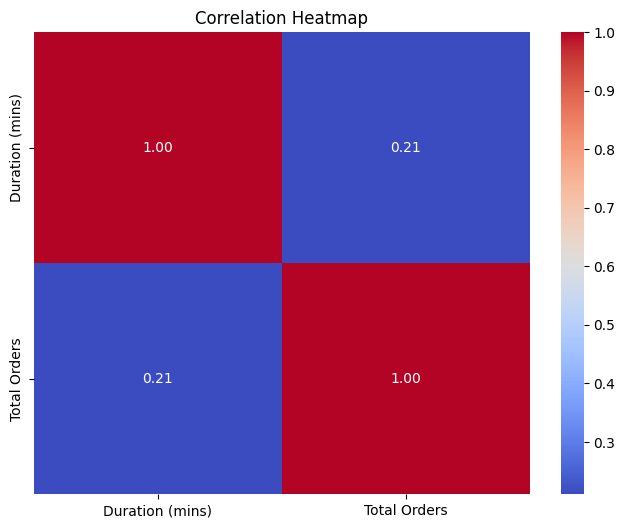

In [15]:
# 1. Correlation Analysis

correlation = merged_data[['Duration (mins)', 'Total Orders']].corr()
print("Correlation between Cooking Session Duration and Total Orders:")
print(correlation)

#visualization
plt.figure(figsize=(8, 6))
sn.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.savefig('Correlation Heatmap.png') 
plt.show()


Top 10 Popular Dishes:
Dish Name
Spaghetti          4
Grilled Chicken    4
Caesar Salad       3
Pancakes           2
Veggie Burger      2
Oatmeal            1
Name: count, dtype: int64


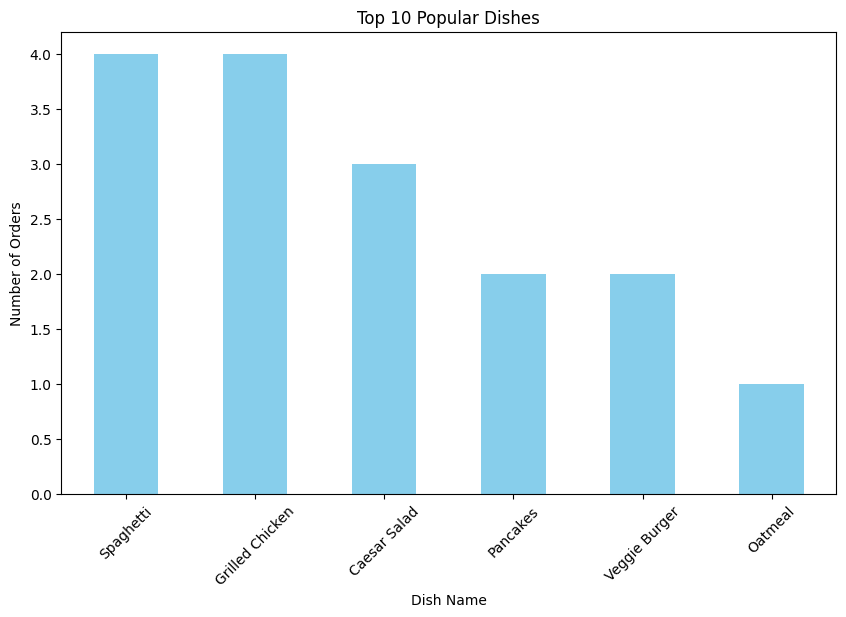

In [16]:
# 2. Popular Dishes

popular_dishes = OrderDetails['Dish Name'].value_counts().head(10)
print("\nTop 10 Popular Dishes:")
print(popular_dishes)

#visualization
plt.figure(figsize=(10, 6))
popular_dishes.plot(kind='bar', color='skyblue')
plt.title('Top 10 Popular Dishes')
plt.xlabel('Dish Name')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.savefig('Top 10 Popular Dishes.png')  
plt.show()


Average Total Orders by Age Group:
Age
25     7.0
27    10.0
28    12.0
30     9.0
31     5.0
35     8.0
38    14.0
42    15.0
Name: Total Orders, dtype: float64


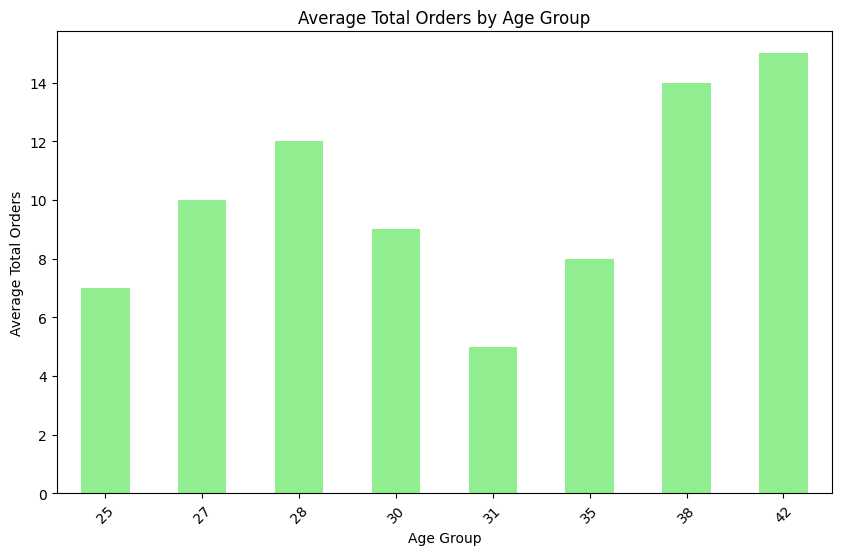

In [17]:
# 3. Demographic Analysis

bins = [0, 18, 30, 45, 60, 100]  # Define your age bins
labels = ['0-18', '19-30', '31-45', '46-60', '60+']  # Define your age group labels
UserDetails['age_group'] = pd.cut(UserDetails['Age'], bins=bins, labels=labels)

demographic_analysis = merged_data.groupby('Age')['Total Orders'].mean()
print("\nAverage Total Orders by Age Group:")
print(demographic_analysis)

#visualization
plt.figure(figsize=(10, 6))
demographic_analysis.plot(kind='bar', color='lightgreen')
plt.title('Average Total Orders by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Total Orders')
plt.xticks(rotation=45)
plt.savefig('Average Total Orders by Age Group.png')  
plt.show()
